In [243]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Implementation of optimizers for minmax problem

We define the loss function $L(x,y) = xy$, together with $F(x,y) = [\frac{dL}{dy}, -\frac{dL}{dx}]$ and want to solve the problem $min_xmax_yL(x,y)$

In [250]:
# z = (x,y)
def L(z):
    return z[0] * z[1]

def F(z):
    return np.array([z[1], -z[0]])

In [245]:
def plot_trajectory(points, grads, max_iters, title, line_color = 'b'):
    """Plot the trajectory in the x-y plane of a DTA. 
        INPUT:
            points: list of np.array, each corresponding to one point at one iteration
            grads : list of np.array, each corresponding to the direction to the next iterate"""
            
    xs = [z[0] for z in points]
    ys = [z[1] for z in points]
    plt.rcParams["figure.figsize"] = (8,8)
    plt.scatter(xs[0], ys[0], color = 'r', lw = 3, label = "Starting point")
    plt.scatter(0, 0, color = 'k', lw = 2, label = "Minimum point", marker='*')
    plt.plot(xs, ys, color = line_color, label = 'Trajectory')

    # Add gradient arrows
    scale = 0.2
    x_grads = [z[0] for z in grads]
    y_grads = [z[1] for z in grads]
    for i in range(0, max_iters, int(max_iters/10)):
        plt.arrow(xs[i], ys[i], -scale*x_grads[i], -scale*y_grads[i], lw = 1.5, head_width = 0.05, color = line_color)

    plt.legend(loc = 'upper right')
    if title is not None:
        plt.suptitle(title) 

## Gradient Descent Ascent: z' = z - sF(z)
Spiral outwards, diverges

In [246]:
def GDA(z0, gamma, max_iters, plot = True):
    """Gradient Descent Ascent algorithm"""
    points = []
    grads = []

    z = z0
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Compute gradient
        grad = F(z)
        grads.append(np.copy(grad))

        # Update z with the algorithm
        z -= gamma * grad

    if plot:
        plot_trajectory(points, grads, max_iters, title = 'GDA trajectory for L(x,y) = xy', line_color='b')

    return points, grads


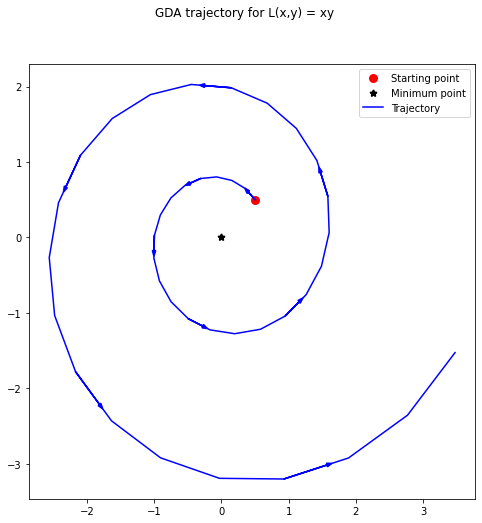

In [247]:
z0 = np.array([0.5,.5])
gamma = 0.3
max_iters = 40

points, grads = GDA(z0, gamma, max_iters)

## Extra Gradient Method z' = z_t - sF(z_t), z_t = z - sF(z)
Thanks to the computation of the intermediary point z_t, this method spirals inwards, converging to the minimum.

In [248]:
def EGM(z0, gamma, max_iters, plot = True):
    """Extra Gradient Method"""
    points = []
    grads = []

    z = np.copy(z0)
    z_t = np.copy(z0)
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Update intermediary point
        grad_z = F(z)
        z_t = z - gamma*grad_z

        # Update next point
        grad_z_t = F(z_t)
        z -= gamma*grad_z_t

        grads.append(np.copy(grad_z_t))


    if plot:
        plot_trajectory(points, grads, max_iters, 'EGM trajectory for L(x,y) = xy', line_color='g')

    return points, grads

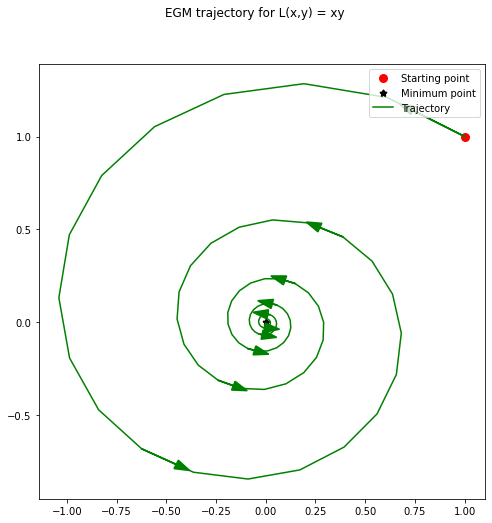

In [249]:
z0 = np.array([1.,1.])
gamma = 0.3
max_iters = 100

points, grads = EGM(z0, gamma, max_iters)